# Аналитика продаж компьютерных игр в магазине "Стримчик"

Были получены данные продаж магазина "Стримчик". Основной целью данного исследования является оценка продаж с целью прогнозирования продаж на 2017 год. 
Задачи:
1. Первично изучить данные.
2. Подготовить данные для дальнейшего анализа. 
3. Провести исследовательский анализ.
Изучить продажи за разные годы, платформы и жанры игр.
4. Составить портрет пользователя каждого региона
5. Провести статистический анализ.
Проверить гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Импортирование библиотек и загрузка данных

### Импортирование библиотек

In [1]:
# импортирую необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st 
from scipy.stats import binom, norm
import numpy as np
import seaborn
import plotly.express as px

pd.options.mode.chained_assignment = None

### Зазругка и первичное изучение данных

In [2]:
df = pd.read_csv('C:/Users/Zenbook/Desktop/Проекты/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

Обнаруженные проблемы: необходимо перевести названия столбцов на "язык питона".

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
df.isnull().mean()*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

В данных есть категории с очень большим процентом пропусков: оценка критиков, оценка пользователей, рейтинг. Вполне возможно, что критики и пользователи могли не дать оценку непопулярным играм или данная игра вышла недавно и ее еще не оценили. Большое отсутствие данных по рейтингу вызывает вопросы. Необходимо проверить не было ли проблем при выгрузке данных или каких-либо технических ошибок при сборе.

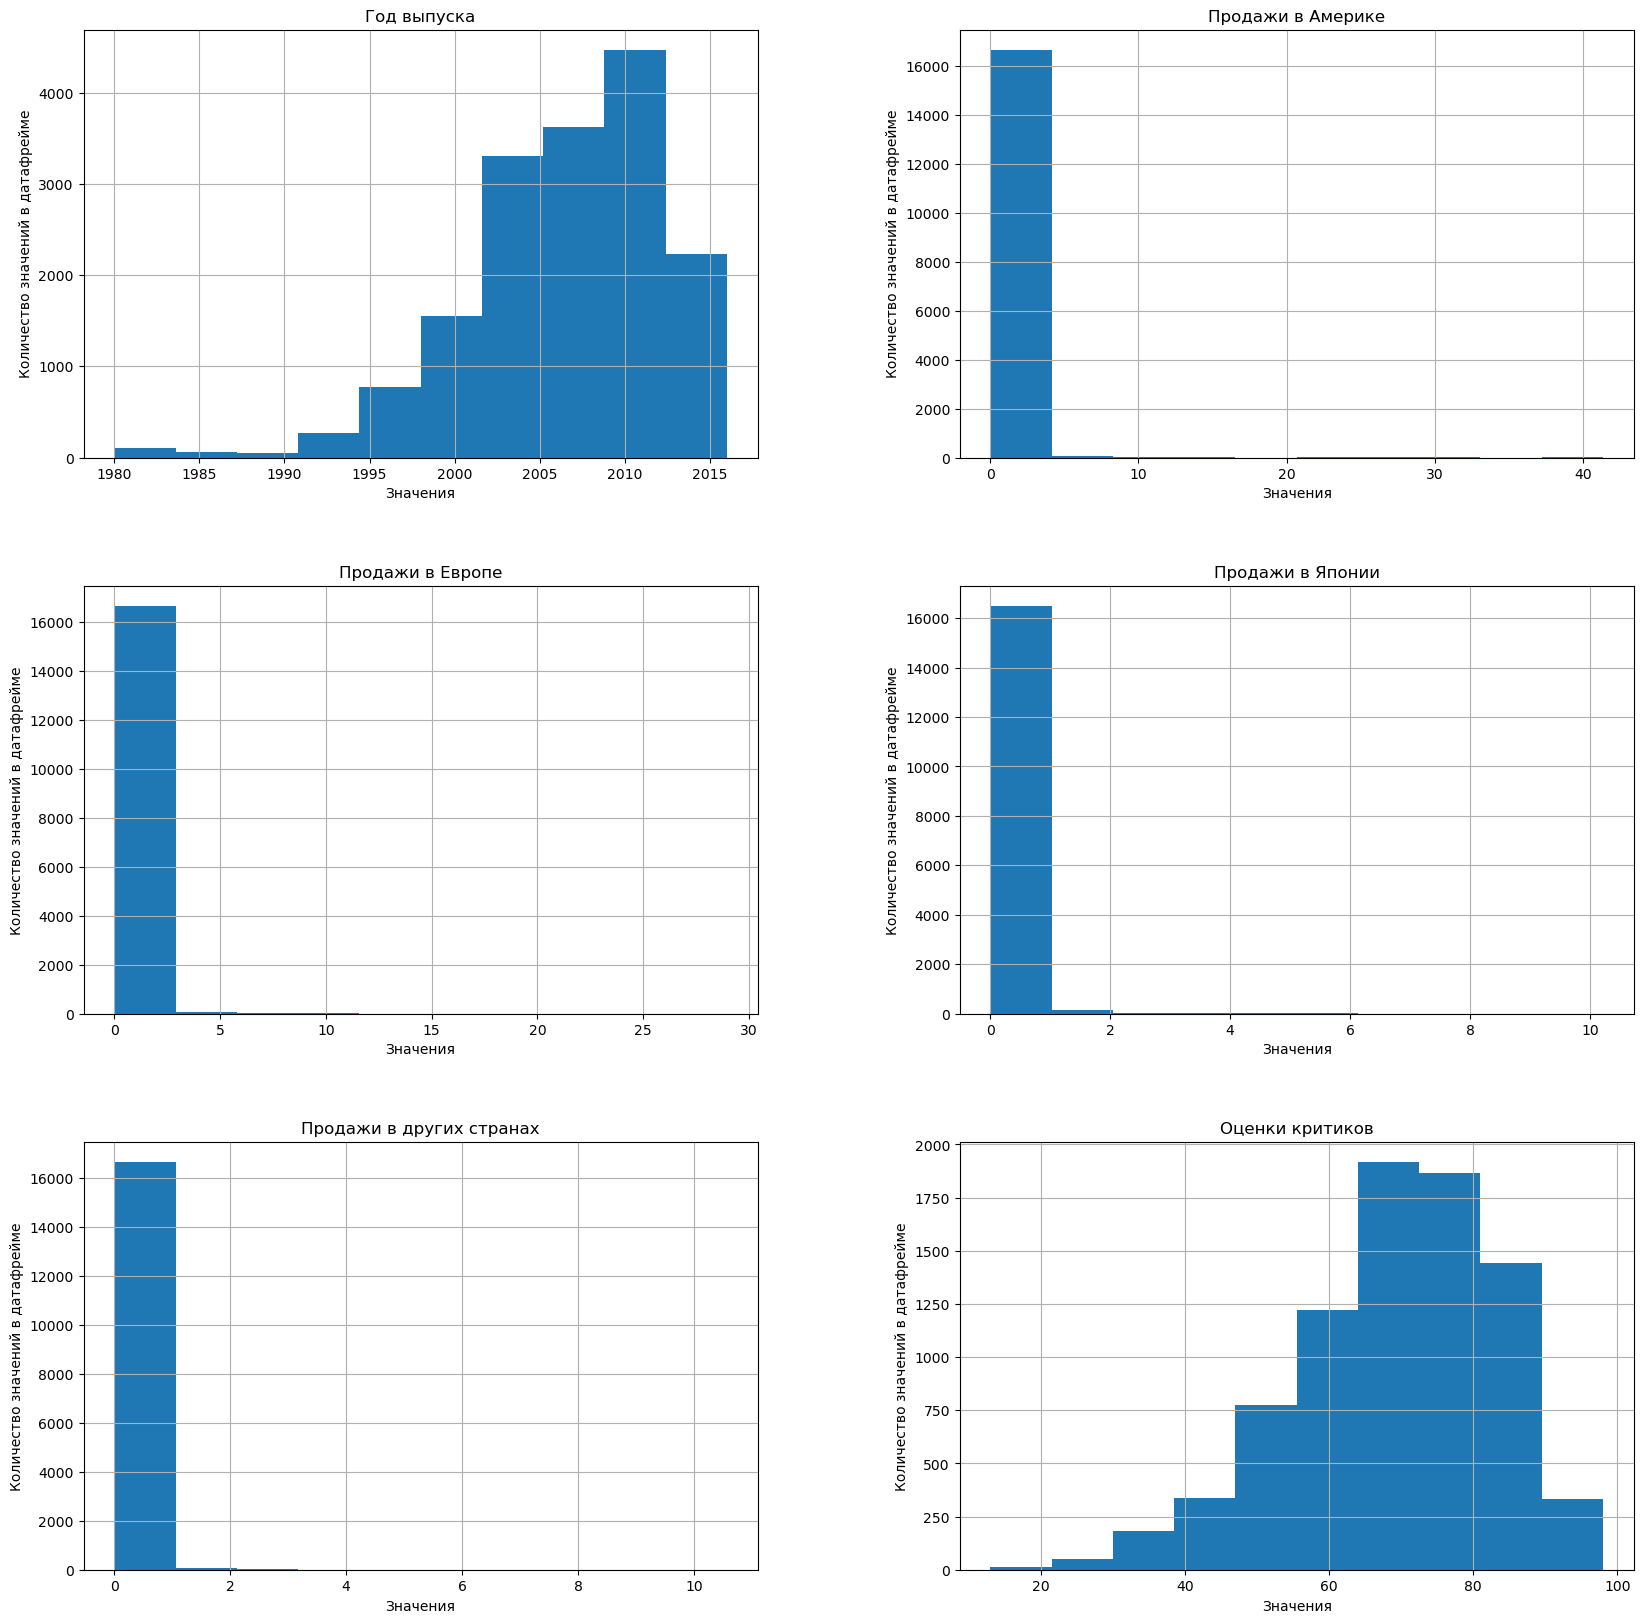

In [7]:
new_title =['Год выпуска', 'Продажи в Америке', 'Продажи в Европе', 'Продажи в Японии', 
            'Продажи в других странах', 'Оценки критиков', 'Оценки пользователей']
axes = df.hist(figsize = (20,20))
for  i in range(6):
    axes[i // 2, i %  2].set_title(new_title[i])
for ax in axes.flatten():
    ax.set_xlabel('Значения')
    ax.set_ylabel('Количество значений в датафрейме')
plt.show()

Как мы видим в распредении данных есть:
1. В годах распределение близко к нормальному, вилен постепенных рост продаж.
2. В пррдажах разных регионов видны высокие пики и так же есть еле заметные мелкие.
3. Рапсределение оценок критиков так же близка к нормальному распределению.

## Предобработка данных 

### Приведение столбцов в единый вид

In [8]:
df.columns = df.columns.str.lower()

### Поиск и обработка дубликатов

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучим данные на предмет дубликатов. Тип оценки пользователей - объект. Необходимо изучить данный момент и исправить тип данных. 

In [10]:
df.duplicated().sum()

0

Явных дубликатов в датафрейме нет. Изучим неявные дубликаты. Они могут быть в названии игр. 

In [11]:
df['name'].nunique()

11559

In [12]:
df['name'].value_counts()

name
Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11559, dtype: int64

In [13]:
df.loc[df['name'] == 'Need for Speed: Most Wanted']

name platform  year_of_release   genre  \
253    Need for Speed: Most Wanted      PS2           2005.0  Racing   
523    Need for Speed: Most Wanted      PS3           2012.0  Racing   
1190   Need for Speed: Most Wanted     X360           2012.0  Racing   
1591   Need for Speed: Most Wanted     X360           2005.0  Racing   
1998   Need for Speed: Most Wanted       XB           2005.0  Racing   
2048   Need for Speed: Most Wanted      PSV           2012.0  Racing   
3581   Need for Speed: Most Wanted       GC           2005.0  Racing   
5972   Need for Speed: Most Wanted       PC           2005.0  Racing   
6273   Need for Speed: Most Wanted     WiiU           2013.0  Racing   
6410   Need for Speed: Most Wanted       DS           2005.0  Racing   
6473   Need for Speed: Most Wanted      GBA           2005.0  Racing   
11715  Need for Speed: Most Wanted       PC           2012.0  Racing   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
253        2.03      1.79      0.08         0.47          82.0        9.1   
523        0.71      1.46      0.06         0.58           NaN        NaN   
1190       0.62      0.78      0.01         0.15          83.0        8.5   
1591       1.00      0.13      0.02         0.10          83.0        8.5   
1998       0.53      0.46      0.00         0.05          83.0        8.8   
2048       0.33      0.45      0.01         0.22           NaN        NaN   
3581       0.43      0.11      0.00         0.02          80.0        9.1   
5972       0.02      0.23      0.00         0.04          82.0        8.5   
6273       0.13      0.12      0.00         0.02           NaN        NaN   
6410       0.24      0.01      0.00         0.02          45.0        6.1   
6473       0.19      0.07      0.00         0.00           NaN        8.3   
11715      0.00      0.06      0.00         0.02          82.0        8.5   

      rating  
253        T  
523      NaN  
1190       T  
1591       T  
1998       T  
2048     NaN  
3581       T  
5972       T  
6273     NaN  
6410       E  
6473       E  
11715      T

In [14]:
df.loc[df['name'] == 'Monopoly']

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
658   Monopoly       PC           1994.0  Misc      1.49      0.81       0.0   
913   Monopoly      Wii           2008.0  Misc      0.86      0.83       0.0   
1250  Monopoly       PS           1997.0  Misc      1.18      0.27       0.0   
3383  Monopoly     X360           2008.0  Misc      0.34      0.20       0.0   
4522  Monopoly      PS2           2008.0  Misc      0.21      0.16       0.0   
5390  Monopoly      PS3           2008.0  Misc      0.25      0.05       0.0   
6341  Monopoly       DS           2010.0  Misc      0.15      0.09       0.0   
7398  Monopoly      N64           1999.0  Misc      0.17      0.04       0.0   

      other_sales  critic_score user_score rating  
658          0.10           NaN        NaN    NaN  
913          0.20          70.0        7.8      E  
1250         0.05           NaN        NaN    NaN  
3383         0.06          56.0        5.8      E  
4522         0.05           NaN        7.2      E  
5390         0.04          54.0        6.7      E  
6341         0.02           NaN        tbd    NaN  
7398         0.00           NaN        NaN    NaN

При анализе данных стало понятно, что одна  та же игра может быть реализована на разных платформах. Изучим, есть ли неявные пропуски отфильтровав данные по трем критериям: название, платформа и год выпуска. 

In [15]:
df[df.duplicated(subset=['name','platform','year_of_release'])]

name platform  year_of_release   genre  na_sales  eu_sales  \
14244            NaN      GEN           1993.0     NaN       0.0      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score user_score rating  
14244      0.03          0.0           NaN        NaN    NaN  
16230      0.00          0.0          83.0        5.5      E

In [16]:
df.query('name ==  "Madden NFL 13" & platform == "PS3"')

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score user_score rating  
604         0.0         0.23          83.0        5.5      E  
16230       0.0         0.00          83.0        5.5      E

In [17]:
df = df.drop_duplicates(subset=['name','platform','year_of_release'])

Были обработаны и устранены неявные дубликаты. 

### Обработка пропусков

In [18]:
df = df.dropna(subset=['name', 'genre'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Столбец с годом выпуска можно не трогать, т к далее мы будем работать только с 2016 годом. Заменим пропуски на Nan. Так же заменим на Nan оценки критиков и пользователей, т к косвенно мы не можем восстановаить данные по этим категориям. Рассмотрим рейтинг. Попробуем восстановить пропуски косвенно: изучим взаимосвязь рейтинга игры от жанра. Есть вероятность, что, например, для жанра гонки будет рейтинг 6+, а для жанра мморпг 16+. 

In [20]:
df['genre'].sort_values(ascending=True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [21]:
action = df.loc[df['genre'] == 'Action']
action['rating'].value_counts()

rating
T       681
M       608
E10+    481
E       416
AO        1
EC        1
Name: count, dtype: int64

In [22]:
shooter = df.loc[df['genre'] == 'Shooter']
shooter['rating'].value_counts()

rating
M       565
T       348
E10+     58
E        48
Name: count, dtype: int64

In [23]:
misc = df.loc[df['genre'] == 'Misc']
misc['rating'].value_counts()

rating
E       457
T       239
E10+    167
M        13
EC        5
K-A       1
Name: count, dtype: int64

Связь между жанром и рейтингом не такая сильная. В связи с этим заменим пропуски в данном столбце на no rating.

In [24]:
df['rating'] = df['rating'].fillna('no rating')

In [25]:
df.loc[df['rating'] == 'no rating']

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

          rating  
1      no rating  
4      no rating  
5      no rating  
9      no rating  
10     no rating  
...          ...  
16710  no rating  
16711  no rating  
16712  no rating  
16713  no rating  
16714  no rating  

[6764 rows x 11 columns]

### Изменение типов данных в столбцах

Изучим почему столбец user_score имеет тип данных объект

In [26]:
df['user_score'].sort_values(ascending=True).unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [27]:
df.loc[df['user_score'] == 'tbd']

name platform  year_of_release  \
119                               Zumba Fitness      Wii           2010.0   
301              Namco Museum: 50th Anniversary      PS2           2005.0   
520                             Zumba Fitness 2      Wii           2011.0   
645                                uDraw Studio      Wii           2010.0   
657    Frogger's Adventures: Temple of the Frog      GBA              NaN   
...                                         ...      ...              ...   
16695                           Planet Monsters      GBA           2001.0   
16697                          Bust-A-Move 3000       GC           2003.0   
16698                          Mega Brain Boost       DS           2008.0   
16704                                  Plushees       DS           2008.0   
16706             Men in Black II: Alien Escape       GC           2003.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
119        Sports      3.45      2.59       0.0         0.66           NaN   
301          Misc      2.08      1.35       0.0         0.54          61.0   
520        Sports      1.51      1.03       0.0         0.27           NaN   
645          Misc      1.65      0.57       0.0         0.20          71.0   
657     Adventure      2.15      0.18       0.0         0.07          73.0   
...           ...       ...       ...       ...          ...           ...   
16695      Action      0.01      0.00       0.0         0.00          67.0   
16697      Puzzle      0.01      0.00       0.0         0.00          53.0   
16698      Puzzle      0.01      0.00       0.0         0.00          48.0   
16704  Simulation      0.01      0.00       0.0         0.00           NaN   
16706     Shooter      0.01      0.00       0.0         0.00           NaN   

      user_score rating  
119          tbd      E  
301          tbd   E10+  
520          tbd      T  
645          tbd      E  
657          tbd      E  
...          ...    ...  
16695        tbd      E  
16697        tbd      E  
16698        tbd      E  
16704        tbd      E  
16706        tbd      T  

[2424 rows x 11 columns]

С помощью интеренета узнала, что tbd означает, что рейтинг неизвестен. По смыслу tbd равен пропуску, в связи с этим заменяю это значение на пропуск и меняю тип столбца. 

In [28]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [29]:
df['user_score'].sort_values(ascending=True).unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [30]:
df['user_score'] = pd.to_numeric(df['user_score'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Проверим остальные столбцы на аномальные значения. Как говорилось выше, заменять пропуски не будем, но оценим что нет отрицательных значений.

In [32]:
df['year_of_release'].sort_values(ascending=True).unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [33]:
df['na_sales'].sort_values(ascending=True).unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

Аномальных значений нет. Т к продажи в миллионах проданных копий, то числа в степенях -2 и -1 можно объяснить продажами менее миллиона копий.

In [34]:
df['eu_sales'].sort_values(ascending=True).unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

In [35]:
df['jp_sales'].sort_values(ascending=True).unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

In [36]:
df['other_sales'].sort_values(ascending=True).unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.600e-01,
       6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01, 7.200e-01,
       7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01, 7.800e-01,
       7.900e-01, 8.000e-01, 8.100e-01, 8.200e-01, 

In [37]:
df['critic_score'].sort_values(ascending=True).unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Причины пропусков: возможно была техническая ошибка при получении данных. Так же необходимо уточнить, не вносились ли какаие-либо данные вручную, в таком случае возможен человеческий фактор, то есть некоторые строчки просто пропустили.

В данных столбцах аномальных значений не найдено.
По итогу предподготовки данных было сделано следующее: 
1. Удалены пропуски в названии игр (менее 2% информации от всего датасета)
2. Изучено наличие дублирующей информации
3. В столбце с оценкой пользователей заменили tbd на Nan, чтобы далее данное значение не мешало анализу

### Расчет суммарных продаж

In [38]:
df['total_sales'] = df.apply(lambda row: row['na_sales' : 'other_sales'].sum(),axis=1)

## Исследовательский анализ

### Изучение данных о годах релиза игр

Рассмотрим сколько игр выпускалось в какие года.

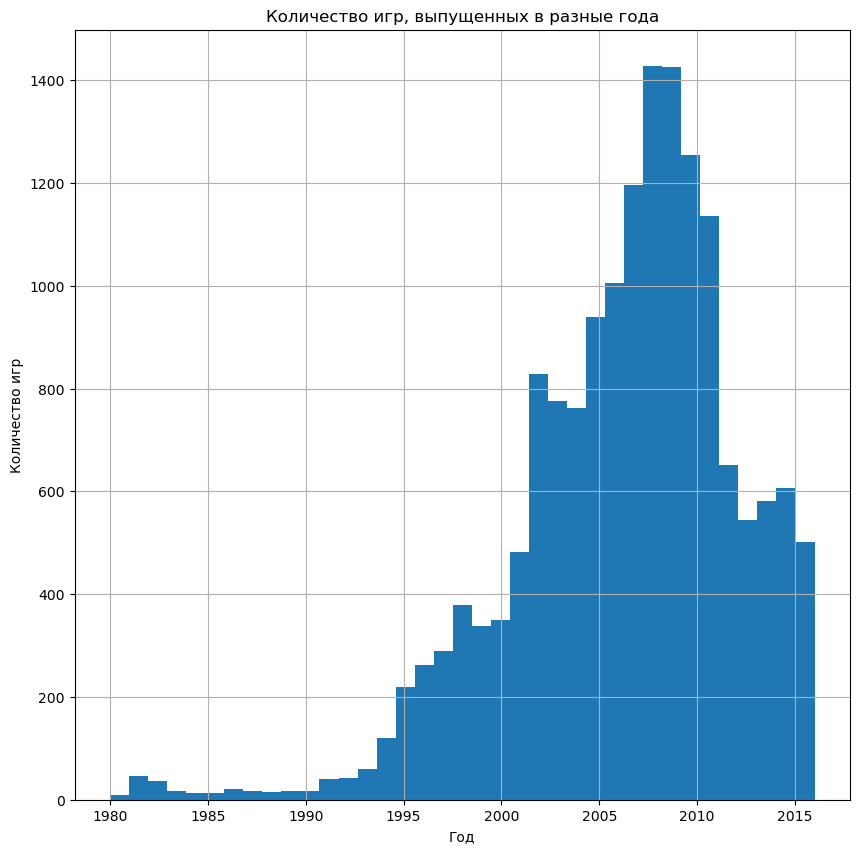

In [39]:
df.hist('year_of_release', bins = 37, figsize=(10, 10))
plt.title('Количество игр, выпущенных в разные года')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Как мы видим, пиком продаж является период с 2005 по 2010 год. Возможно это связано с увеличеем доступности приставок и игровых станций, но с ещё малым количесвтом конкурентов или продажи могут быть связаны с играми с "громкой репутацией" и хорошей рекламной компанией. Ближе к актуальным годам наблюдается спад продаж. Если это связано с увеличением количества конкурентов, то тогда необходимо пересмотреть рекламную компанию и привлечь больше покупателей. 

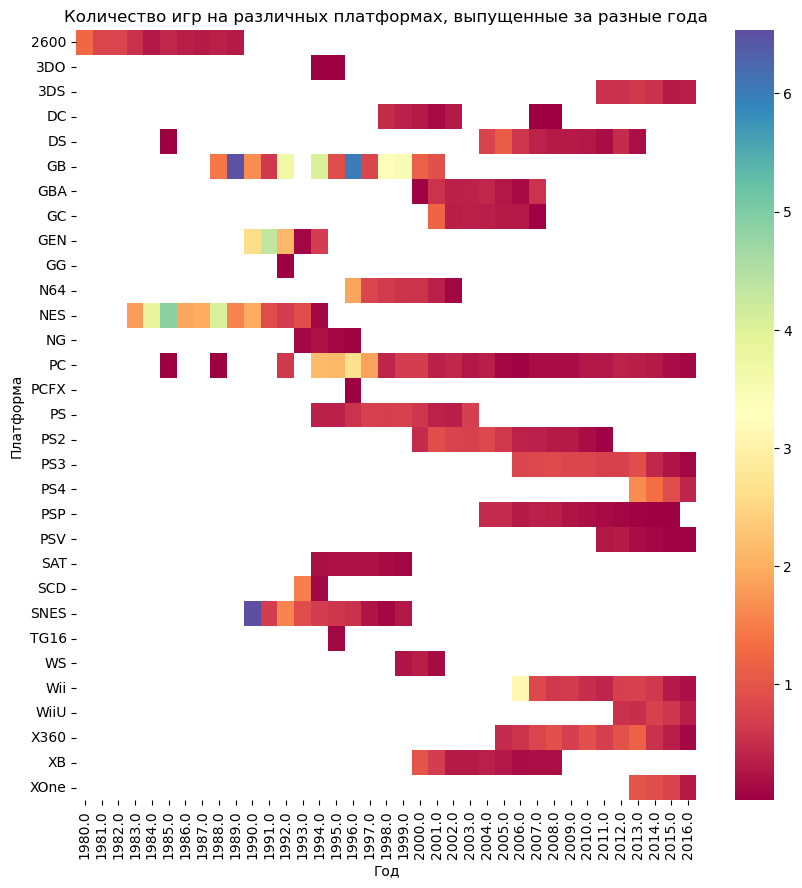

In [40]:
top_platform = df.sort_values(by = 'total_sales').pivot_table(index = 'platform', values = 'total_sales', columns = 'year_of_release') 

plt.figure(figsize = (10, 10))
seaborn.heatmap(top_platform, cmap = 'Spectral')
plt.title('Количество игр на различных платформах, выпущенные за разные года')
plt.xlabel('Год')
plt.ylabel('Платформа')
plt.show()

Как видно из тепловой диаграммы видно что есть платформы с коротким периодом "жизни" (например WS, которая просущетсвовала 4 года), те что периодически перевыпускаются (PC, есть несколько единичных запусков, после чего платформа актуальна и на актуальный год) и с длительным периодом (примером является тот же PC). 

Согласно графику средний срок "жизни" платформы примерно 6-10 лет. Рассчитаем более точно.

In [41]:
temp = df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 

time_life['life'].median()

7.0

Средений срок составляет 7 лет. 

### Исследовательский анализ данных за актуальный период

Исходя из проведенных ранее исследований, в качестве акутального периода можно взять период 2014-2016 гг, т к с 2014 есть платформы, которые актальны на данных момент.  Подготовим срез данных в отдельный датафрейм.
Задачи: 
1. Изучить, какие платформы лидируют, растут или падают
2. Построить ящик с усами для глобальной оценки прожа игр
3. Оценить влияние оценки пользователей и критиков на продажи игр
4. Оценить распределение по жанрам

#### Подготовка среза данных за актуальный период

In [42]:
#делаю срез данных и проверяю корректность среза
df_actual = df.query('year_of_release >= 2014')
df_actual.head(10)

name platform  year_of_release  \
31                   Call of Duty: Black Ops 3      PS4           2015.0   
42                          Grand Theft Auto V      PS4           2014.0   
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS           2014.0   
77                                     FIFA 16      PS4           2015.0   
87                Star Wars Battlefront (2015)      PS4           2015.0   
92              Call of Duty: Advanced Warfare      PS4           2014.0   
94                                     FIFA 17      PS4           2016.0   
96         Super Smash Bros. for Wii U and 3DS      3DS           2014.0   
99                   Call of Duty: Black Ops 3     XOne           2015.0   
105                                  Fallout 4      PS4           2015.0   

            genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31        Shooter      6.03      5.86      0.36         2.38           NaN   
42         Action      3.96      6.31      0.38         1.97          97.0   
47   Role-Playing      4.35      3.49      3.10         0.74           NaN   
77         Sports      1.12      6.12      0.06         1.28          82.0   
87        Shooter      2.99      3.49      0.22         1.28           NaN   
92        Shooter      2.81      3.48      0.14         1.23          83.0   
94         Sports      0.66      5.75      0.08         1.11          85.0   
96       Fighting      3.27      1.37      2.43         0.48           NaN   
99        Shooter      4.59      2.11      0.01         0.68           NaN   
105  Role-Playing      2.53      3.27      0.24         1.13          87.0   

     user_score     rating  total_sales  
31          NaN  no rating        14.63  
42          8.3          M        12.62  
47          NaN  no rating        11.68  
77          4.3          E         8.58  
87          NaN  no rating         7.98  
92          5.7          M         7.66  
94          5.0          E         7.60  
96          NaN  no rating         7.55  
99          NaN  no rating         7.39  
105         6.5          M         7.17

In [43]:
df_actual['year_of_release'].sort_values(ascending=True).unique()

array([2014., 2015., 2016.])

#### Изучение платформ, представленных в магазине

Изучим распределение платформ и выберем какие из них самые популярные.

In [44]:
platforms = df_actual.sort_values(by='total_sales', ascending=False).pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales')
platforms

year_of_release    2014.0    2015.0    2016.0
platform                                     
3DS              0.547000  0.323023  0.329130
PC               0.282553  0.170400  0.097222
PS3              0.442222  0.230411  0.094737
PS4              1.333333  0.867883  0.422256
PSP              0.024000  0.040000       NaN
PSV              0.119000  0.056818  0.050000
Wii              0.625000  0.285000  0.180000
WiiU             0.710645  0.583929  0.328571
X360             0.551429  0.341714  0.116923
XOne             0.886393  0.751750  0.300575

In [45]:
platforms.columns = ['2014_year', '2015_year', '2016_year']

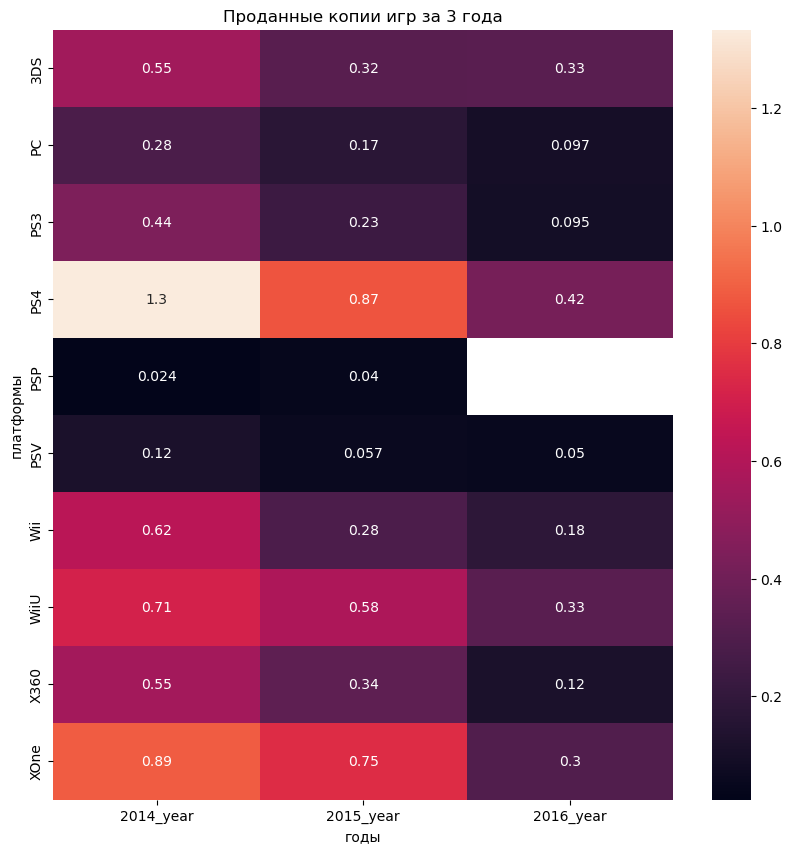

In [46]:
plt.figure(figsize = (10, 10))
heat_plat = seaborn.heatmap(platforms, annot= True)
heat_plat.set(title='Проданные копии игр за 3 года', ylabel='платформы', xlabel='годы');
plt.show()

In [47]:
platforms['total_sales'] = platforms.apply(lambda row: row['2014_year' : '2016_year'].sum(),axis=1)
platforms.sort_values(by = 'total_sales', ascending = False)

2014_year  2015_year  2016_year  total_sales
platform                                              
PS4        1.333333   0.867883   0.422256     2.623473
XOne       0.886393   0.751750   0.300575     1.938718
WiiU       0.710645   0.583929   0.328571     1.623145
3DS        0.547000   0.323023   0.329130     1.199154
Wii        0.625000   0.285000   0.180000     1.090000
X360       0.551429   0.341714   0.116923     1.010066
PS3        0.442222   0.230411   0.094737     0.767370
PC         0.282553   0.170400   0.097222     0.550175
PSV        0.119000   0.056818   0.050000     0.225818
PSP        0.024000   0.040000        NaN     0.064000

Из данного блока исследования можно сделать следующие выводы:
1. Топ-3 платформ: PS4, XOne и WiiU. То есть на них стоит сделать упор, т к они самые популярные. 
2. Платформа PSP в 2016 году не имеет продаж совсем, скорее всего на данную платформу не выпускались уже игры. В связи с этим при планировании на следующий год не следует делать упор на PSP, а так же на PC и PSV, т к продаж мало. 

#### Оценка продаж игр по платформам

Построим боксплот для оценки продаж по платформам.

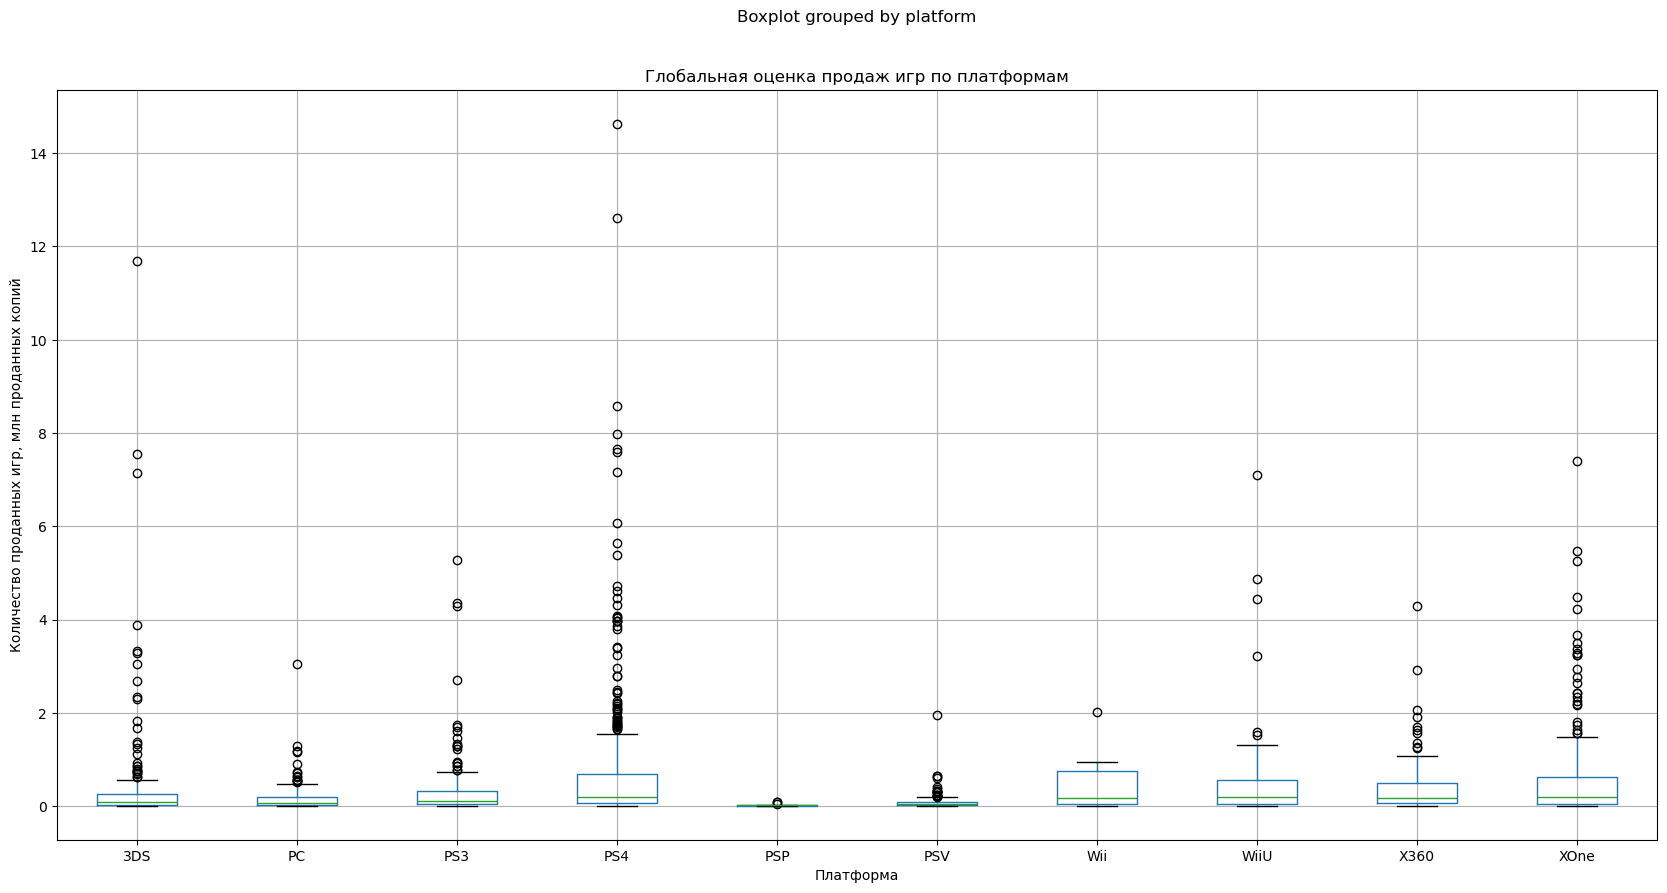

In [48]:
df_actual.boxplot(column = ['total_sales'], by = 'platform', figsize = (20, 10))
plt.title('Глобальная оценка продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр, млн проданных копий')
plt.show()

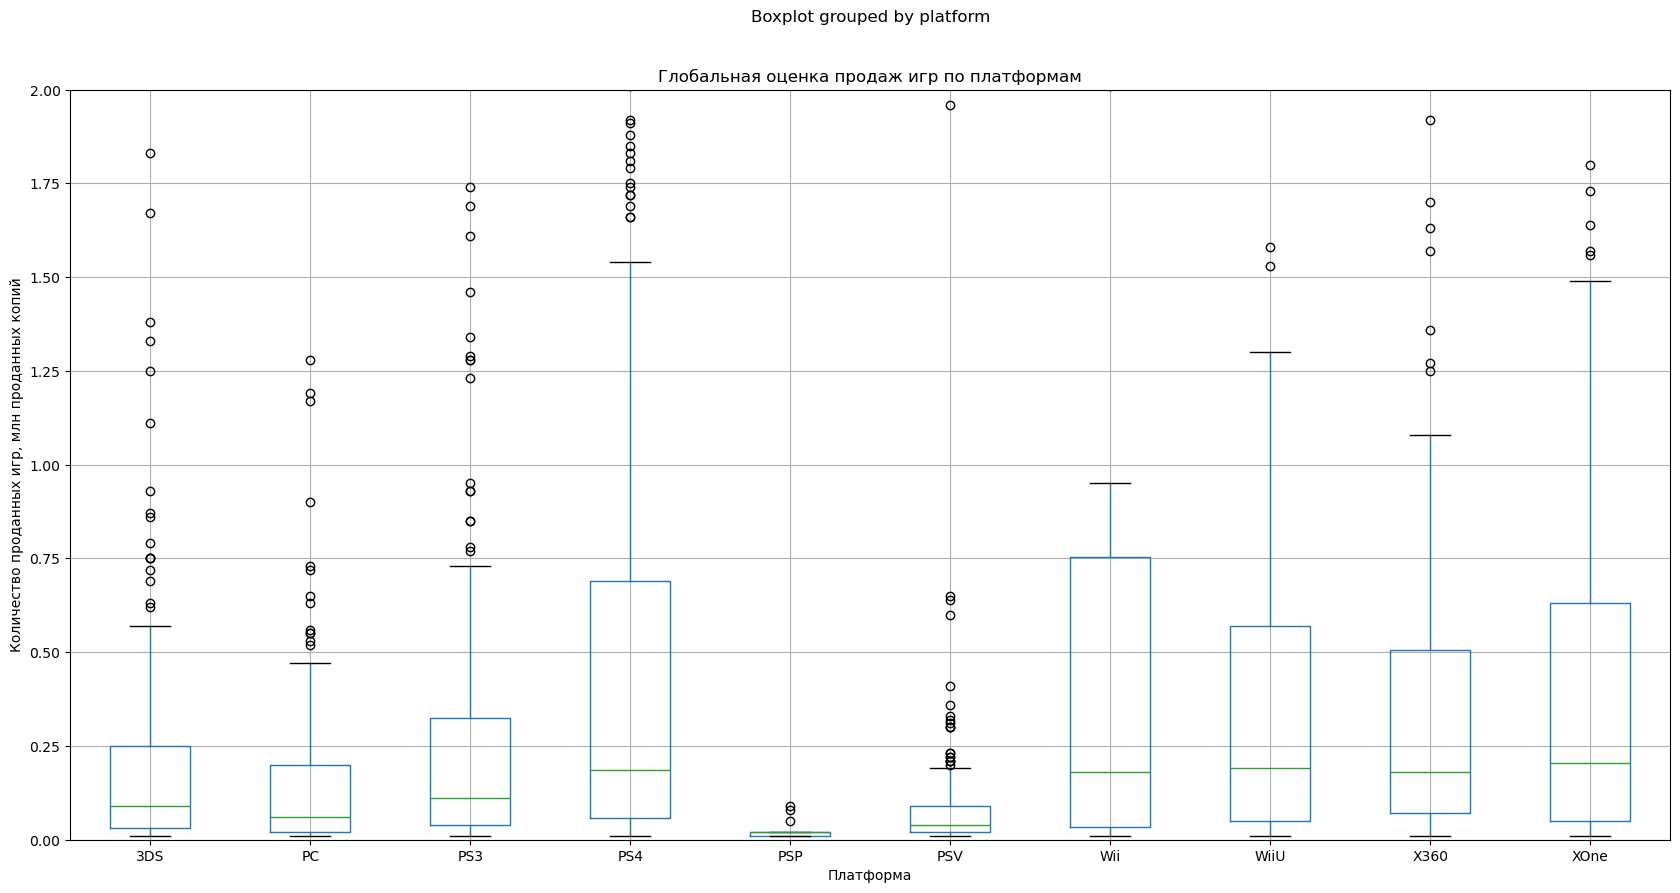

In [49]:
df_actual.boxplot(column = ['total_sales'], by = 'platform', figsize = (20, 10))
plt.title('Глобальная оценка продаж игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных игр, млн проданных копий')
plt.ylim(0, 2)
plt.show()

In [50]:
df_actual.sort_values(by = 'total_sales', ascending = False)

name platform  \
31                         Call of Duty: Black Ops 3      PS4   
42                                Grand Theft Auto V      PS4   
47         Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS   
77                                           FIFA 16      PS4   
87                      Star Wars Battlefront (2015)      PS4   
...                                              ...      ...   
16264                                     Worms: WMD     XOne   
16267                  The Book of Unwritten Tales 2     WiiU   
16270                                   Hyakka Yakou      PSV   
16276  Sangoku Koi Senki: Omoide Gaeshi - CS Edition      PSV   
16714                            Winning Post 8 2016      PSV   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
31              2015.0       Shooter      6.03      5.86      0.36   
42              2014.0        Action      3.96      6.31      0.38   
47              2014.0  Role-Playing      4.35      3.49      3.10   
77              2015.0        Sports      1.12      6.12      0.06   
87              2015.0       Shooter      2.99      3.49      0.22   
...                ...           ...       ...       ...       ...   
16264           2016.0        Action      0.01      0.00      0.00   
16267           2016.0     Adventure      0.00      0.01      0.00   
16270           2015.0        Action      0.00      0.00      0.01   
16276           2016.0     Adventure      0.00      0.00      0.01   
16714           2016.0    Simulation      0.00      0.00      0.01   

       other_sales  critic_score  user_score     rating  total_sales  
31            2.38           NaN         NaN  no rating        14.63  
42            1.97          97.0         8.3          M        12.62  
47            0.74           NaN         NaN  no rating        11.68  
77            1.28          82.0         4.3          E         8.58  
87            1.28           NaN         NaN  no rating         7.98  
...            ...           ...         ...        ...          ...  
16264         0.00          75.0         8.1       E10+         0.01  
16267         0.00           NaN         NaN          T         0.01  
16270         0.00           NaN         NaN  no rating         0.01  
16276         0.00           NaN         NaN  no rating         0.01  
16714         0.00           NaN         NaN  no rating         0.01  

[1689 rows x 12 columns]

За данный период времени было реализовано 1689 игр на различных платформах, самой популярной является Call of Duty: Black Ops 3. 

#### Влияние отзывов критиков и пользователей

Задача: рассмотреть, как отзывы критиков и пользователей влияют на продажи игр

In [51]:

px.scatter(df_actual, x= 'user_score', y= 'total_sales', color='platform',facet_col='platform',
           facet_col_wrap=2, title = 'Зависимость продаж игр на разных платформах от оценки пользователей',
           labels = dict(user_score = 'Оценка пользователей', total_sales = 'Продажи, млн. проданных копий'),
           width = 1000, height = 2000)

In [52]:
df_actual.loc[:,  ['platform','total_sales', 'critic_score', 'user_score']
].pivot_table(index='platform',values=['total_sales', 'critic_score', 'user_score'], aggfunc='corr')

critic_score  total_sales  user_score
platform                                                    
3DS      total_sales       0.314117     1.000000    0.215193
         critic_score      1.000000     0.314117    0.862485
         user_score        0.862485     0.215193    1.000000
PC       total_sales       0.174634     1.000000   -0.071597
         critic_score      1.000000     0.174634    0.466099
         user_score        0.466099    -0.071597    1.000000
PS3      total_sales       0.446575     1.000000   -0.166761
         critic_score      1.000000     0.446575    0.693445
         user_score        0.693445    -0.166761    1.000000
PS4      total_sales       0.402661     1.000000   -0.040132
         critic_score      1.000000     0.402661    0.546434
         user_score        0.546434    -0.040132    1.000000
PSP      total_sales            NaN     1.000000         NaN
PSV      total_sales       0.042665     1.000000   -0.168455
         critic_score      1.000000     0.042665    0.524066
         user_score        0.524066    -0.168455    1.000000
Wii      total_sales            NaN     1.000000    1.000000
         user_score             NaN     1.000000    1.000000
WiiU     total_sales       0.370201     1.000000    0.407926
         critic_score      1.000000     0.370201    0.763536
         user_score        0.763536     0.407926    1.000000
X360     total_sales       0.525723     1.000000   -0.138445
         critic_score      1.000000     0.525723    0.625309
         user_score        0.625309    -0.138445    1.000000
XOne     total_sales       0.428677     1.000000   -0.070384
         critic_score      1.000000     0.428677    0.440977
         user_score        0.440977    -0.070384    1.000000

По графикам видно, что все точки в осноном прижимаются к низу графика и не выстраиваются в прямую линию. Так же если рассмотреть таблицу с корреляциями, то видно что коэффициенты не более 0.5. Всего этого можно сделать вывод, что зависимость продаж от оценки пользователей или критиков имеет слабую силу связи (если опираться на шкалу Чеддока). 

#### Общее распределение игр по жанрам

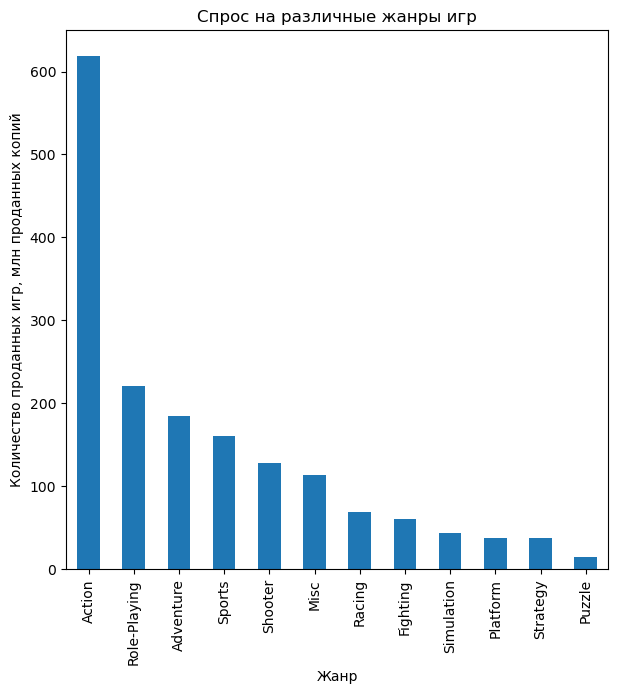

In [53]:
df_actual['genre'].value_counts().plot(kind= 'bar',x = 'genre', 
                                       y = 'total_sales', 
                                       figsize = (7,7), 
                                       title = 'Спрос на различные жанры игр')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн проданных копий')
plt.show()

Согласно графику самым популярным жанром является Action. Данный жанр пользуется самым большим спросом. Самым непопулярный жанр Puzzle.

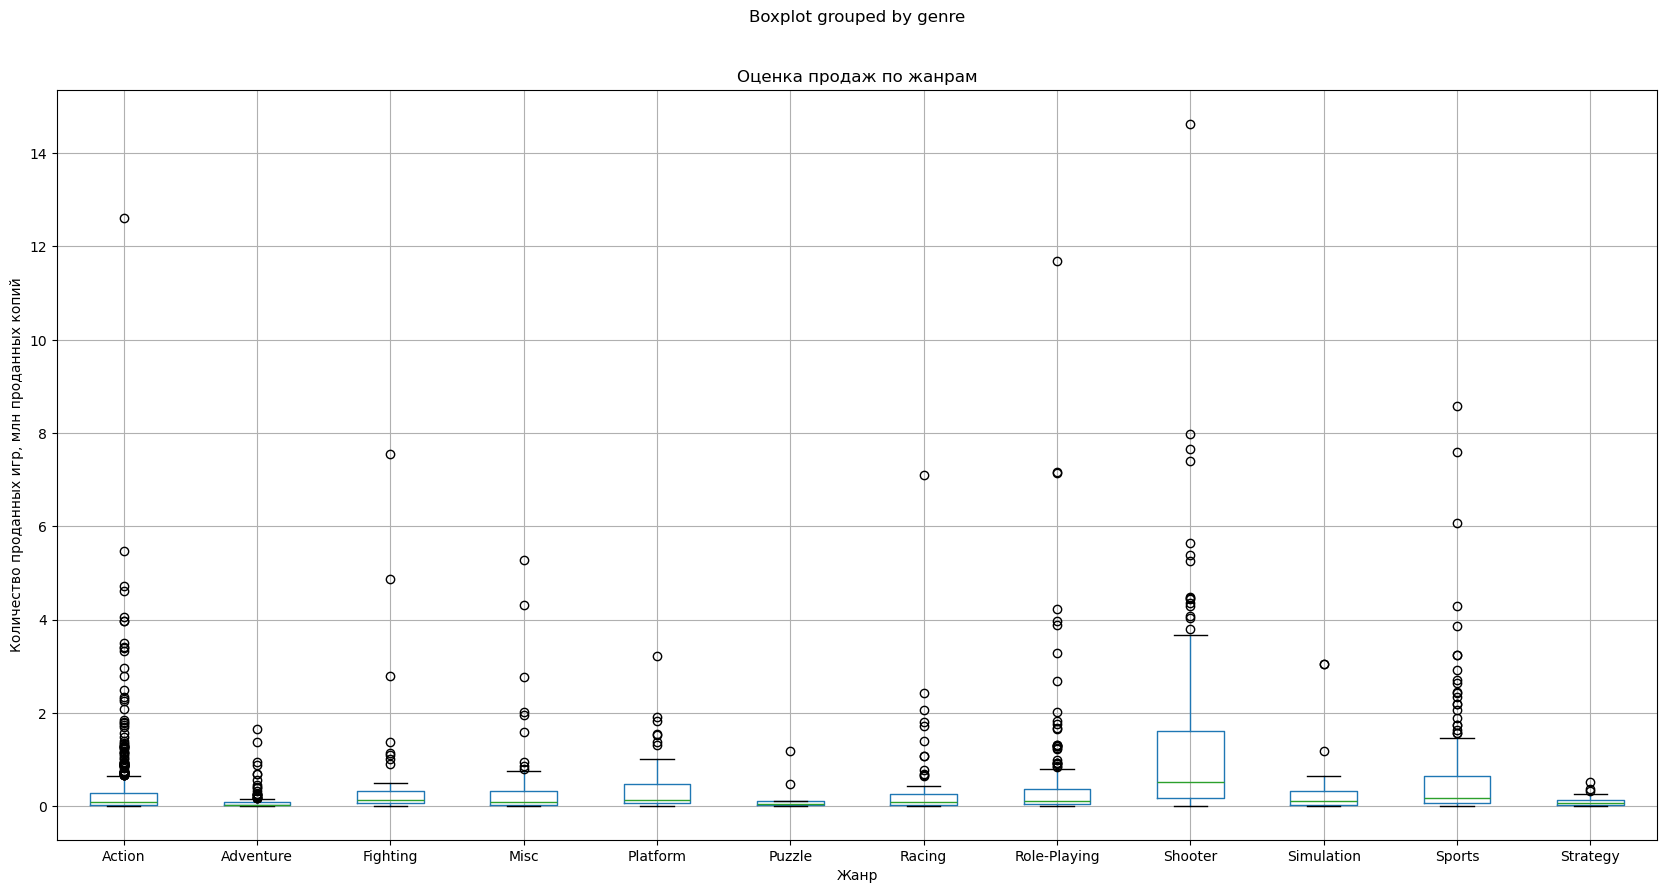

In [54]:
df_actual.boxplot(column = ['total_sales'], by = 'genre', figsize = (20, 10))
plt.title('Оценка продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн проданных копий')
plt.show()

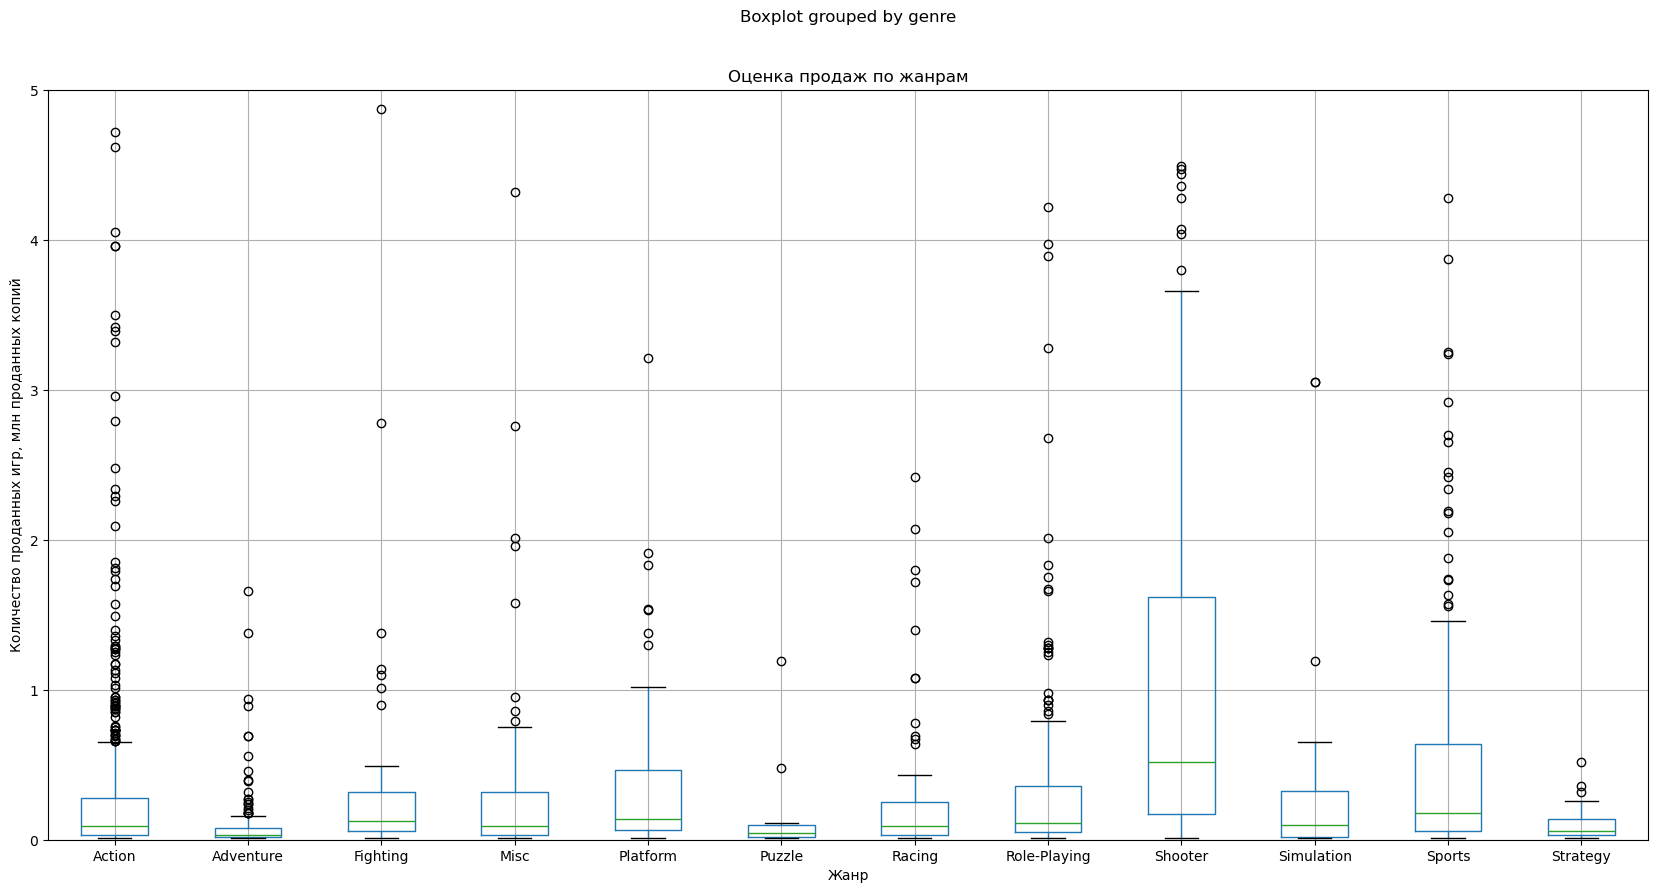

In [55]:
df_actual.boxplot(column = ['total_sales'], by = 'genre', figsize = (20, 10))
plt.title('Оценка продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных игр, млн проданных копий')
plt.ylim(0, 5)
plt.show()

In [56]:
genre = df_actual.pivot_table(index='genre', values='total_sales', aggfunc=('sum', 'median'))
genre.sort_values(by='median', ascending=False)

median     sum
genre                       
Shooter        0.515  170.94
Sports         0.180  109.48
Platform       0.140   18.09
Fighting       0.125   28.22
Role-Playing   0.110  101.44
Simulation     0.100   13.13
Action         0.090  199.36
Misc           0.090   37.55
Racing         0.090   27.52
Strategy       0.060    3.96
Puzzle         0.045    2.21
Adventure      0.030   17.55

Одним из самый стабильных жанров является жанр Shooter. Он имеет меньше всего выбросов и самую большую медиану по сравнению с остальными жанрами. Самым "врывным" жанром является Action, т к если рассматривать боксплот данного направления, видно что выбросы сливаются в одну линию, но при этом есть и сильные выбросы.

## Портрет потребителя в различных регионах

 ### Портрет потребителя региона NA. Платформы

Рассмотрим, ТОП-5 платформ, которые привлекают жителей данного региона.

In [57]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(8), object(4)
memory usage: 171.5+ KB


In [58]:
na = df_actual.pivot_table(index = 'platform', values = ['na_sales'])

In [59]:
na.head(5)

na_sales
platform          
3DS       0.106792
PC        0.047881
PS3       0.100685
PS4       0.262261
PSP       0.000000

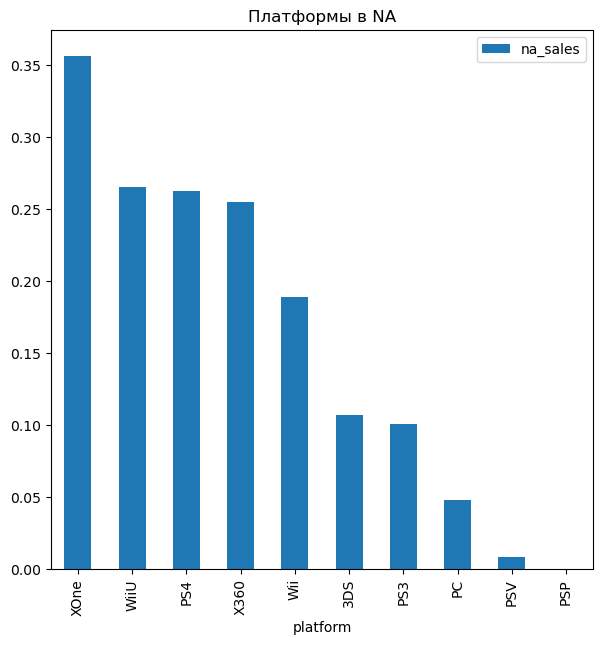

In [60]:
na.sort_values(by = 'na_sales', ascending = False).plot(kind= 'bar', y = 'na_sales', figsize = (7,7), title = 'Платформы в NA')
plt.show()

### Портрет потребителя региона EU. Платформы

Рассмотрим, ТОП-5 платфорv, которые привлекают жителей данного региона.

In [61]:
eu = df_actual.pivot_table(index = 'platform', values = 'eu_sales')
eu.head(5)

eu_sales
platform          
3DS       0.076038
PC        0.119007
PS3       0.116621
PS4       0.345851
PSP       0.000000

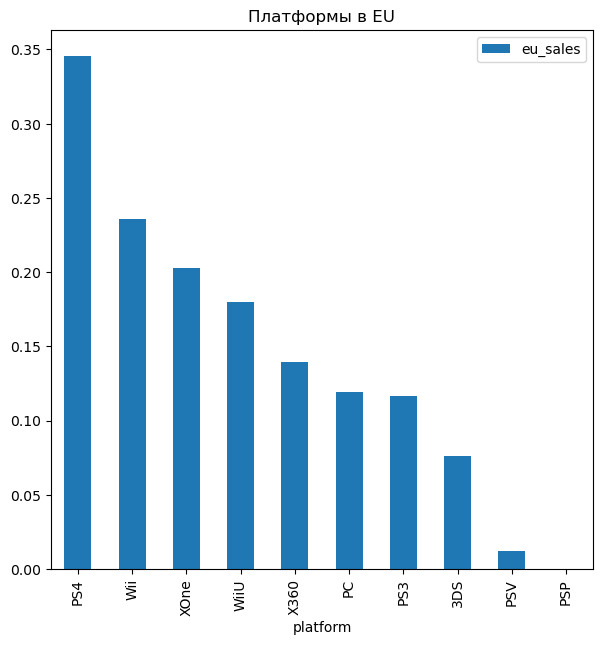

In [62]:
eu.sort_values(by = 'eu_sales', ascending = False).plot(kind= 'bar', y = 'eu_sales', figsize = (7,7), title = 'Платформы в EU')
plt.show()

 ### Портрет потребителя региона JP. Платформы

Рассмотрим, ТОП-5 платформ, которые привлекают жителей данного региона.

In [63]:
jp = df_actual.pivot_table(index = 'platform', values = 'jp_sales')
jp.head(5)

jp_sales
platform          
3DS       0.208679
PC        0.000000
PS3       0.051233
PS4       0.039947
PSP       0.027692

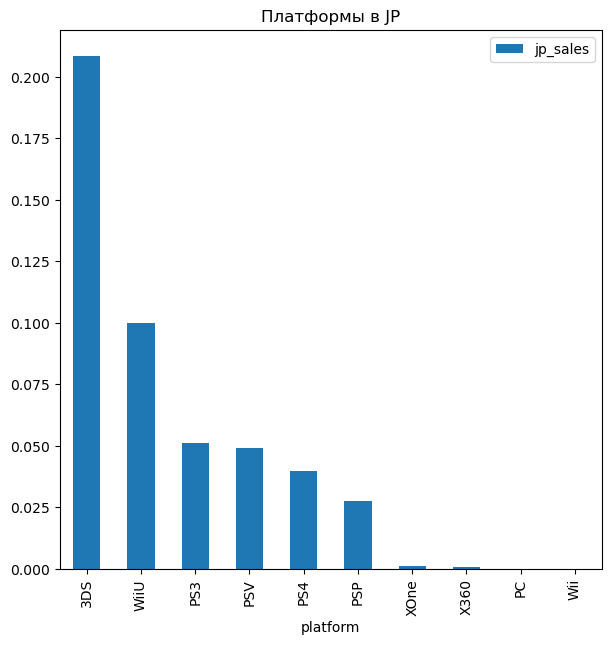

In [64]:
jp.sort_values(by = 'jp_sales', ascending = False).plot(kind= 'bar', y = 'jp_sales', figsize = (7,7), title = 'Платформы в JP')
plt.show()

1. В Америке предпочитают играть на XOne. 
2. В Европе популярна PS4.
3. В Японии популярной платформой ялвяется 3DS

Если оценивать ранее полученные данные, то выходит что наибольший клад в продажи вносит Европа и Америка. Рассмотрим распределение жанров в странах. 


### Портрет потребителя. Жанры

Рассмотрим жанры, которые пользуются популярностью в различных регионах.

In [65]:
top_genre_na = df_actual.pivot_table(index = 'genre', 
                        values = 'na_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').head(5)
top_genre_na

na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05

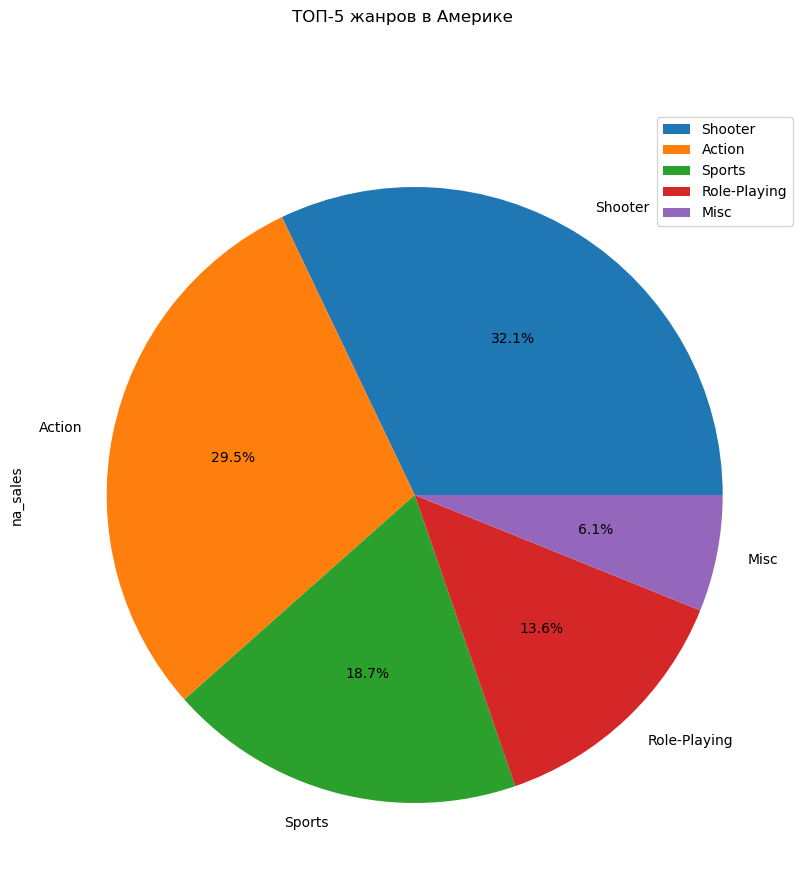

In [66]:
top_genre_na.plot( kind = 'pie',figsize = (10,10), subplots=True, title = 'ТОП-5 жанров в Америке', autopct='%1.1f%%')
plt.show()

In [67]:
top_genre_eu = df_actual.pivot_table(index = 'genre', 
                        values = 'eu_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').head(5)
top_genre_eu

eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13

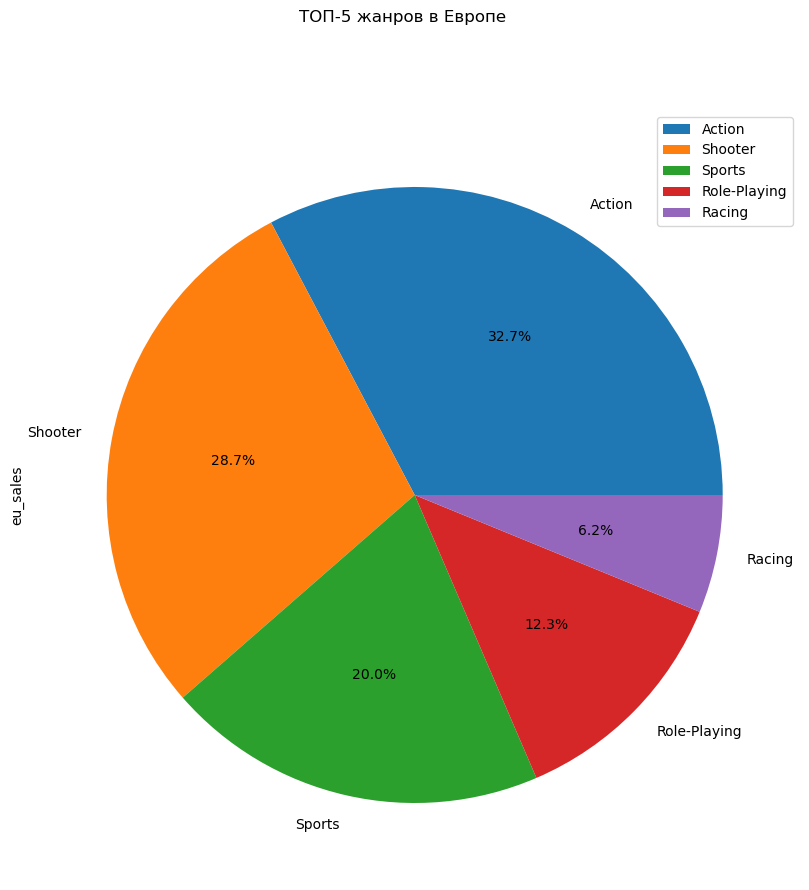

In [68]:
top_genre_eu.plot( kind = 'pie',figsize = (10,10), subplots=True, title = 'ТОП-5 жанров в Европе', autopct='%1.1f%%')
plt.show()

In [69]:
top_genre_jp = df_actual.pivot_table(index = 'genre', 
                        values = 'jp_sales', 
                        aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').head(5)
top_genre_jp

jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87

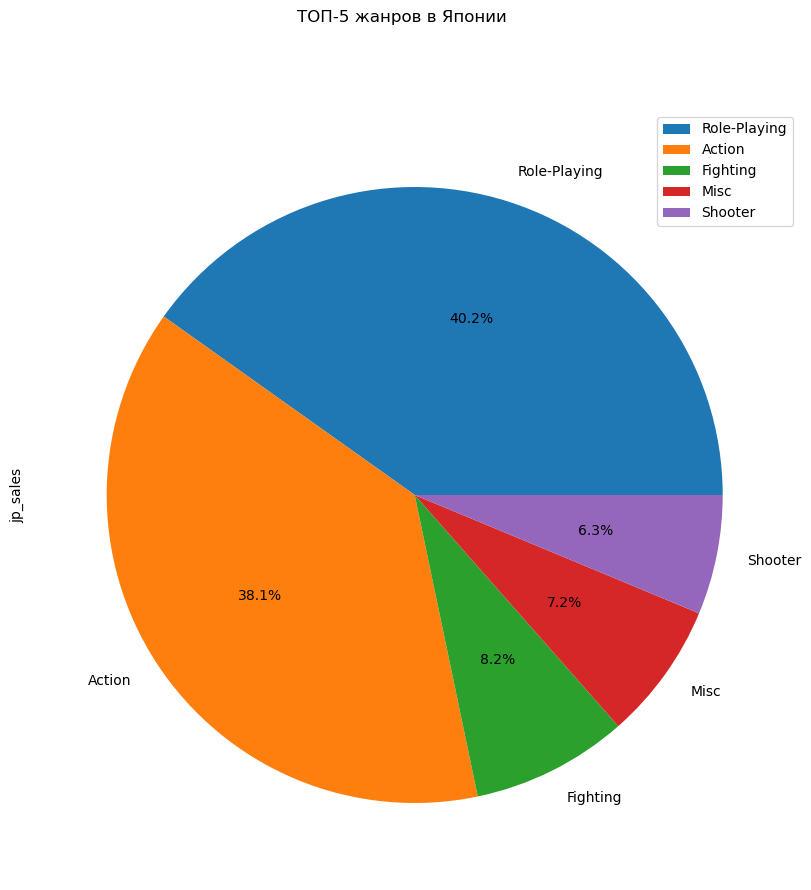

In [70]:
top_genre_jp.plot( kind = 'pie',figsize = (10,10), subplots=True, title = 'ТОП-5 жанров в Японии', autopct='%1.1f%%')
plt.show()

1. В Америке популярны игры жанра шутер и экшн. Скорее всего это с тем, что американский геймдейв в основном заточен на данный тип игр.
2. В Европе ситуация похожа. Вероятно это так жне связано с большим вкладом американского геймдева
3. В Японии популярно RPG. Если рассматривать их режим жизни и культуру, то вероятно японцы предпочитают уходить в фэнтезийные миры от "серый будней"

## Изучение влияния рейтинга на продажи игр

Задача: изучить влияние рейтинга на продажи игр в разных регионах

In [71]:
rating_role = df_actual.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
rating_role

eu_sales  jp_sales  na_sales
rating                                 
E             58.06      8.94     50.74
E10+          26.16      4.46     33.23
M             93.44      8.01     96.42
T             34.07     14.78     38.95
no rating     58.95     56.90     64.72

«E» («Everyone») — «Для всех»
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: 
«T» («Teen») — «Подросткам»
«M» («Mature») — «Для взрослых»
Информация взята из Википедии. 
Т к в датафрейме были пропуски в рейтинге (причина неизвеста), то данные скорее всего искажены. Необходимо уточнить как происходит продажа игр в разных странах (может ли подросток купить игру для взрослых или нет). Можно сдеоать вывод, что в Европе и Америке популярностью пользуются игры для взрослых. Для Японии сделать вывод сложно, т к большей части информации нет. 

 Учытывая, что рейтинг ESRB заполняется только для игр, которые реализуются на территории США и Канады, то можно говорить только о влиянии рейтинга на продажи в Америке (данные есть в датасете). Из всего вышеописанного можно сделать вывод, что в Америке популярностью пользуются игры для взрослых. Для остальных регионов нельзя точно сказать, что рейтинг влияет, только если косвенно. То есть можно сказать, что в Европе лидируют игры с рейтингом для взрослых (от 17 лет) из чего можно сделать небольшие выводы о содержании и контенте игр. Про Японию даже косвенные выводы вывести сложно, т к много игр без данного рейтинга.

## Статистический анализ

Гипотеза: Средние пользовательские рейтинги платформ Xbox One (х1) и PC(х2) одинаковые

Нулевая гипотеза: х1 = х2

Альтернативая гипотеза: х1! = х2


In [72]:
#Подготовим датафреймы для работы
#выделим нудные строки и столбцы и избывимся от пропусков, т к они влияют на работу метода
x1_pc = df_actual.loc[df_actual['platform'] == 'XOne', 'user_score'].dropna()
x2_xbox = df_actual.loc[df_actual['platform'] == 'PC', 'user_score'].dropna()

In [73]:
#гипотеза двухстороняя, поэтому применяем   st.ttest_ind
alpha = 0.05 

results = st.ttest_ind(x1_pc, x2_xbox)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348416
Не получилось отвергнуть нулевую гипотезу


Вывод: Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры)(х1) и Sports (англ. «спортивные соревнования») (х2) разные.

Нулевая гипотеза: x1 = x 2

Альтернативная гипотеза: x1 != x 2

In [74]:
#Подготовим датафреймы для работы
#выделим нудные строки и столбцы и избывимся от пропусков, т к они влияют на работу метода
x1_action = df_actual.loc[df_actual['genre'] == 'Action', 'user_score'].dropna()
x2_sports = df_actual.loc[df_actual['genre'] == 'Sports', 'user_score'].dropna()

In [75]:
alpha = 0.05 

results = st.ttest_ind(x1_action, x2_sports)

print('p-значение:', results.pvalue)
print('Средняя оценка пользователей жанра Action:', round(x1_action.mean(), 2))
print('Средняя оценка пользователей жанра Sports:', round(x2_sports.mean(), 2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.871114798510586e-19
Средняя оценка пользователей жанра Action: 6.76
Средняя оценка пользователей жанра Sports: 5.23
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу, что средние пользовательские рейтинги жанров Action и Sports равны

## Общие выводы

1. В датафрейме есть много пропусков, особенно в столбцах оценки критиков и пользователей, а так же в рейтинге. Данные пропуски являются критичными для анализа данных, в связи с этим необходимо узнать, по какой причине они образовались. Были удалены некритичные пропуски (менье 2% от датафрейма)
2. Всплеск релиза игр наблюдается в период 2006 - 2010 год. Возможно это связано с доступностью консолей и ПК, то есть данные вещи стали появляться в каждом доме. 
3. Самой популярной платформой при глобальном анализе является PS4. 
4. Самый популярный жанр при глобальном анализе Action.
5. По результатам исследования можно сделать вывод, что оценки пользователей и критиков не сильно влияют на продажи.
6. Портрет покупателя из Америки: в основном играет в игры жанра shooter или action на консоли XOne.
7. Портрет покупатели из Европы: предпочитает игры жанра action или shooter на PS4.
8. Портрет покупателя из Японии: использует консоль 3DS и предпочитает игры RPG. 
9. Отвергли гипотезу, что средние пользовательские оценки ПК и XBox равны.
10. Подтвердили, что средние пользовательские оценки по жанрам Action и Sport не равны. 

Рекомендации:  Для Америки: необходимо сделать выбор в пользу игр с рейтингом М на платформах XOne и WiiU в жанрах Action и Shooter. Для Европы: игры рейтинга М на платформах PS4 и WiiU в тех же жанрах, что для Америки. Для Японии оптимально сделать упор на игры в жанре RPG и Action на платформах 3DS b WiiU. Т к в Японии не так распространены игры с утсановленным рейтингом, то сделать вывод о рейтинге сложно. Но предварительно можно сказать, что в Японии популярны игры с рейтингом T.

In [76]:
print('Код не упал!')

Код не упал!
